# 사이킷런 모형 하이퍼 파라미터 튜닝 도구

- validation_curve

    - 단일 하이퍼 파라미터 최적화

- GridSearchCV

    - 그리드를 사용한 복수 하이퍼 파라미터 최적화

- ParameterGrid

    - 복수 파라미터 최적화용 그리드

# Validation_Curve

**validation_curve** 함수는 최적화할 파라미터 이름과 범위, 그리고 성능 기준을 **param_name**, **param_range**, **scoring** 인수로 받아 파라미터 범위의 모든 경우에 대해 성능 기준을 계산한다.

In [1]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data ,digits.target

param_range = np.logspace(-6, -1, 10)

In [2]:
train_score, test_score = validation_curve(SVC(), X, y, param_name='gamma', param_range = param_range,
                cv=10, scoring='accuracy', n_jobs=1)

In [8]:
train_score

array([[0.10204082, 0.10204082, 0.10204082, 0.10204082, 0.10204082,
        0.10204082, 0.10204082, 0.28615575, 0.19159456, 0.19159456],
       [0.71923315, 0.70995671, 0.72108844, 0.716141  , 0.71552257,
        0.71243043, 0.70810142, 0.72435105, 0.73918418, 0.73856613],
       [0.93753865, 0.93444651, 0.93320965, 0.93135436, 0.93692022,
        0.92888064, 0.93382808, 0.93201483, 0.94313968, 0.93263288],
       [0.96846011, 0.96969697, 0.96722325, 0.97217069, 0.96846011,
        0.96722325, 0.96846011, 0.96538937, 0.97342398, 0.97342398],
       [0.98824985, 0.98577613, 0.9894867 , 0.98763142, 0.98639456,
        0.98824985, 0.98824985, 0.98702101, 0.98825711, 0.98825711],
       [0.99814471, 0.99690785, 0.99814471, 0.99752628, 0.99690785,
        0.99814471, 0.99814471, 0.99814586, 0.99814586, 0.99876391],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.       

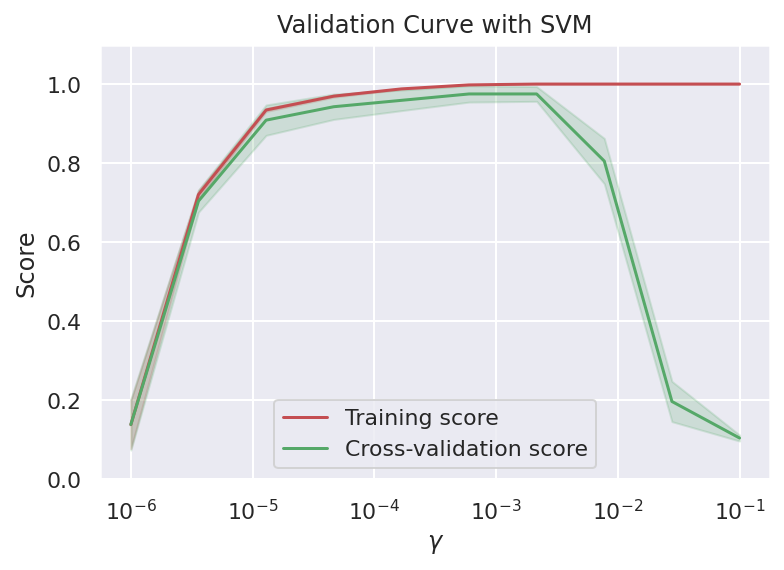

In [10]:
train_scores_mean = np.mean(train_score, axis = 1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean,
             label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

# Grid Search

GridSearchCV 클래스는 validation_curve 함수와 달리 모형 래퍼(Wrapper) 성격의 클래스이다. 클래스 객체에 fit 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾아준다. 생성된 복수개와 내부 모형과 실행 결과는 다음 속성에 저장된다.

- grid_scores_

    - param_grid 의 모든 파리미터 조합에 대한 성능 결과. 각각의 원소는 다음 요소로 이루어진 튜플이다.

- parameters: 사용된 파라미터

- mean_validation_score: 교차 검증(cross-validation) 결과의 평균값

- cv_validation_scores: 모든 교차 검증(cross-validation) 결과

- best_score_

    - 최고 점수

- best_params_

    - 최고 점수를 낸 파라미터

- best_estimator_

    - 최고 점수를 낸 파라미터를 가진 모형

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])
param_range = np.logspace(-4, 3, 8)
param_grid = [
    {'clf__C':param_range, 'clf__kernel' : ['linear']},
    {'clf__C':param_range, 'clf__gamma' : param_range, 'clf__kernel':['rbf']}
]
gs = GridSearchCV(estimator=pipe_svc, param_grid = param_grid,
                 scoring ='accuracy', cv=10, n_jobs=1)
%time gs=gs.fit(X,y)

Wall time: 4min 46s


In [15]:
gs.cv_results_['params']

[{'clf__C': 0.0001, 'clf__kernel': 'linear'},
 {'clf__C': 0.001, 'clf__kernel': 'linear'},
 {'clf__C': 0.01, 'clf__kernel': 'linear'},
 {'clf__C': 0.1, 'clf__kernel': 'linear'},
 {'clf__C': 1.0, 'clf__kernel': 'linear'},
 {'clf__C': 10.0, 'clf__kernel': 'linear'},
 {'clf__C': 100.0, 'clf__kernel': 'linear'},
 {'clf__C': 1000.0, 'clf__kernel': 'linear'},
 {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 10.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 100.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'},
 {'clf__C

In [16]:
gs.cv_results_['mean_test_score']

array([0.23120112, 0.91485413, 0.95046245, 0.95547176, 0.95658908,
       0.95658908, 0.95658908, 0.95658908, 0.13089385, 0.13536313,
       0.13927374, 0.12418994, 0.1001676 , 0.13089385, 0.10687151,
       0.1001676 , 0.13089385, 0.13536313, 0.13927374, 0.12418994,
       0.1001676 , 0.13089385, 0.10687151, 0.1001676 , 0.13089385,
       0.13536313, 0.14429857, 0.12418994, 0.1001676 , 0.13089385,
       0.10687151, 0.1001676 , 0.13089385, 0.68335816, 0.90761639,
       0.40958101, 0.1001676 , 0.13089385, 0.10687151, 0.1001676 ,
       0.70449721, 0.93153011, 0.96047796, 0.90317505, 0.12469894,
       0.1001676 , 0.10128492, 0.1001676 , 0.93264742, 0.95547176,
       0.96937927, 0.90540348, 0.13416511, 0.1001676 , 0.10128492,
       0.1001676 , 0.95547796, 0.96047796, 0.96937927, 0.90540348,
       0.13416511, 0.1001676 , 0.10128492, 0.1001676 , 0.95825885,
       0.95935754, 0.96937927, 0.90540348, 0.13416511, 0.1001676 ,
       0.10128492, 0.1001676 ])

In [17]:
gs.best_score_

0.969379267535692

In [18]:
gs.best_params_

{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

# ParameterGrid

때로는 scikit-learn 이 제공하는 GridSearchCV 이외의 방법으로 그리드 탐색을 해야하는 경우도 있다. 이 경우 파라미터를 조합하여 탐색 그리드를 생성해 주는 명령어가 ParameterGrid 이다. ParameterGrid 는 탐색을 위한 iterator 역할을 한다.

In [19]:
from sklearn.model_selection import ParameterGrid

param_grid = {'a':[1,2], 'b':[True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [20]:
param_grid = [{'kernel':['linearl']}, {'kernel':['rbf'], 'gamma':[1,10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linearl'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

# 병렬 처리

In [24]:
param_grid = {'gamma':np.logspace(-6,-1,10)}
gs1 = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  cv=5, scoring = 'accuracy', n_jobs=1)
gs4 = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  cv=5, scoring = 'accuracy', n_jobs=4)

In [22]:
%%time
gs1.fit(X,y)

Wall time: 13.4 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')

In [25]:
%%time
gs4.fit(X,y)

Wall time: 7.32 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')